In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# Reload the merged CSV file
merged_df = pd.read_csv("data/quarterly_financials/Bermaz_Auto_Berhad_merge_no_of_car.csv")

# Show column names and a sample of the data
merged_columns = merged_df.columns
merged_preview = merged_df.head()

merged_columns, merged_preview


(Index(['Ann. Date', 'Quarter', 'Revenue', 'PBT', 'NP', 'NP to SH', 'NP Margin',
        'ROE', 'EPS', 'DPS', 'NAPS', 'QoQ', 'YoY', 'quarter', 'Number of Cars'],
       dtype='object'),
      Ann. Date      Quarter  Revenue     PBT     NP  NP to SH NP Margin  \
 0  12-Mar-2025  31-Jan-2025   602080   34832  26227     24144     4.36%   
 1  12-Dec-2024  31-Oct-2024   646861   57050  42711     40348     6.60%   
 2  11-Sep-2024  31-Jul-2024   846180   97769  75378     70217     8.91%   
 3  11-Jun-2024  30-Apr-2024   937525  130570  99583     90224    10.62%   
 4  13-Mar-2024  31-Jan-2024   896505   95069  74525     70503     8.31%   
 
       ROE   EPS    DPS    NAPS      QoQ      YoY     quarter  Number of Cars  
 0   3.71%  2.07   1.75  0.5584  -40.16%  -65.75%  2025-01-31          3151.0  
 1   5.41%  3.45  10.00  0.6374  -42.54%  -55.22%  2024-10-31          3396.0  
 2   9.40%  6.01   3.50  0.6398  -22.17%  -29.94%  2024-07-31          4225.0  
 3  10.99%  7.73  11.75  0.7033   27

In [99]:
# Convert Quarter column to datetime if not already
merged_df['Quarter'] = pd.to_datetime(merged_df['Quarter'], errors='coerce')

# Filter rows between 2022-07-31 and 2025-01-31
filtered_df = merged_df[
    (merged_df['Quarter'] >= "2022-07-31") & (merged_df['Quarter'] <= "2025-01-31")
].copy()

# Ensure numeric columns are correctly typed
numeric_cols = ['Revenue', 'PBT', 'NP', 'EPS', 'Number of Cars']
filtered_df[numeric_cols] = filtered_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Sort by quarter
filtered_df.sort_values('Quarter', inplace=True)


Number Of Cars Vs Revenue Over Time

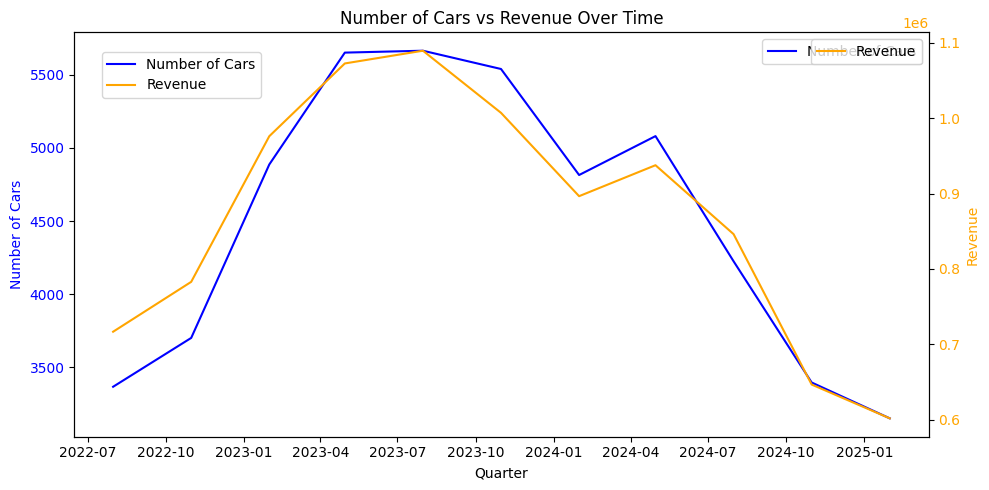

In [100]:
# Plot Number of Cars and Revenue on separate y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Number of Cars on the primary y-axis
sns.lineplot(data=filtered_df, x='Quarter', y='Number of Cars', label='Number of Cars', ax=ax1, color='blue')
ax1.set_ylabel('Number of Cars', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Revenue
ax2 = ax1.twinx()
sns.lineplot(data=filtered_df, x='Quarter', y='Revenue', label='Revenue', ax=ax2, color='orange')
ax2.set_ylabel('Revenue', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and format x-axis
plt.title('Number of Cars vs Revenue Over Time')
ax1.set_xlabel('Quarter')
plt.xticks(rotation=45)

# Add legends for both lines
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()

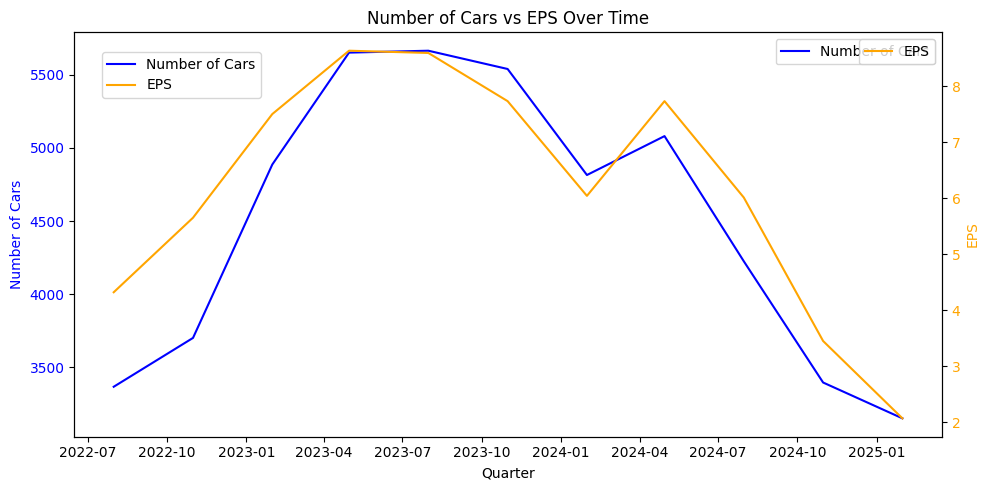

In [101]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Number of Cars on the primary y-axis
sns.lineplot(data=filtered_df, x='Quarter', y='Number of Cars', label='Number of Cars', ax=ax1, color='blue')
ax1.set_ylabel('Number of Cars', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for EPS
ax2 = ax1.twinx()
sns.lineplot(data=filtered_df, x='Quarter', y='EPS', label='EPS', ax=ax2, color='orange')
ax2.set_ylabel('EPS', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and format x-axis
plt.title('Number of Cars vs EPS Over Time')
ax1.set_xlabel('Quarter')
plt.xticks(rotation=45)

# Add legends for both lines
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()


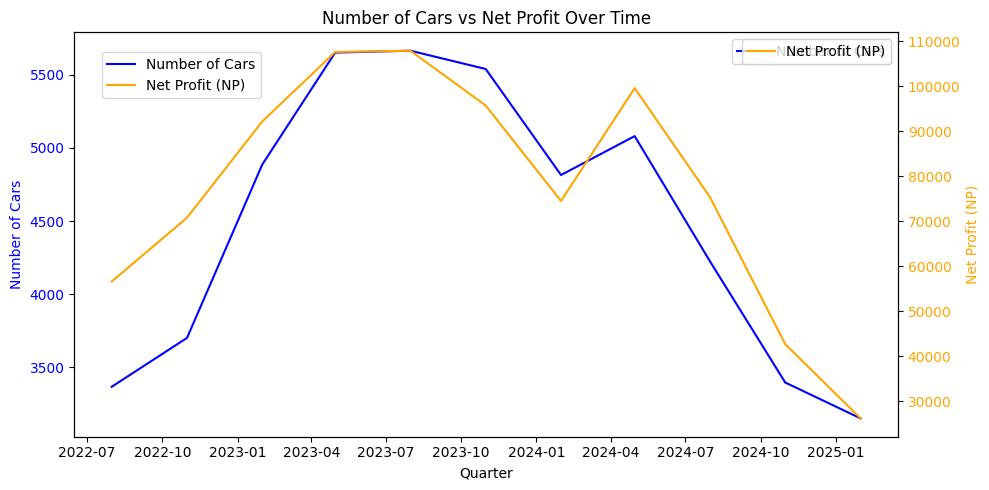

In [102]:
# Plot Number of Cars and Net Profit (NP) on separate y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Number of Cars on the primary y-axis
sns.lineplot(data=filtered_df, x='Quarter', y='Number of Cars', label='Number of Cars', ax=ax1, color='blue')
ax1.set_ylabel('Number of Cars', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Net Profit (NP)
ax2 = ax1.twinx()
sns.lineplot(data=filtered_df, x='Quarter', y='NP', label='Net Profit (NP)', ax=ax2, color='orange')
ax2.set_ylabel('Net Profit (NP)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and format x-axis
plt.title('Number of Cars vs Net Profit Over Time')
ax1.set_xlabel('Quarter')
plt.xticks(rotation=45)

# Add a single legend for both lines
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

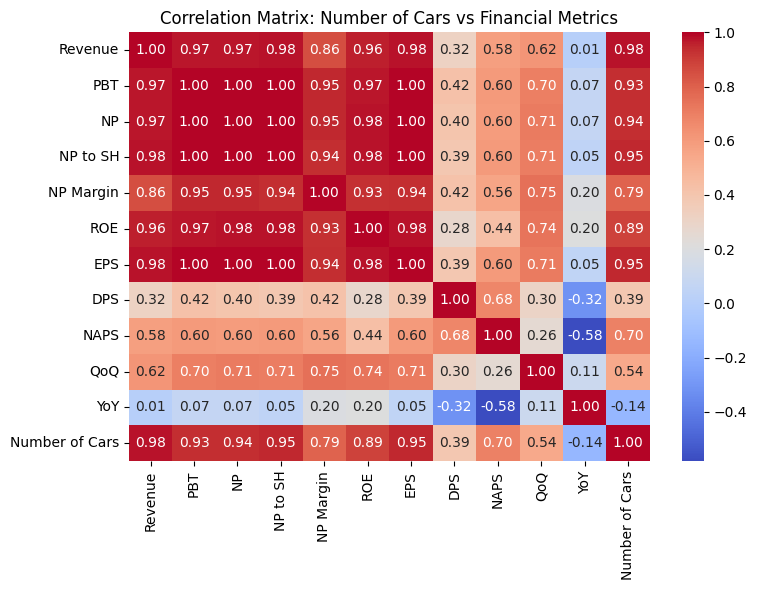

In [ ]:
# Convert percentage columns to float
df_temp = filtered_df.copy()
filtered_df
# Strip % and convert columns like 'NP Margin', 'ROE', 'QoQ', 'YoY' to float
percent_cols = ['NP Margin', 'ROE', 'QoQ', 'YoY']
for col in percent_cols:
    df_temp[col] = filtered_df[col].str.replace(',', '').str.rstrip('%').astype(float)
df_temp
# Add these to the list of numeric columns
full_numeric_cols = df_temp.select_dtypes(include=['number']).columns

# Correlation matrix of key numeric features
corr = df_temp[full_numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Number of Cars vs Financial Metrics')
plt.tight_layout()
plt.show()


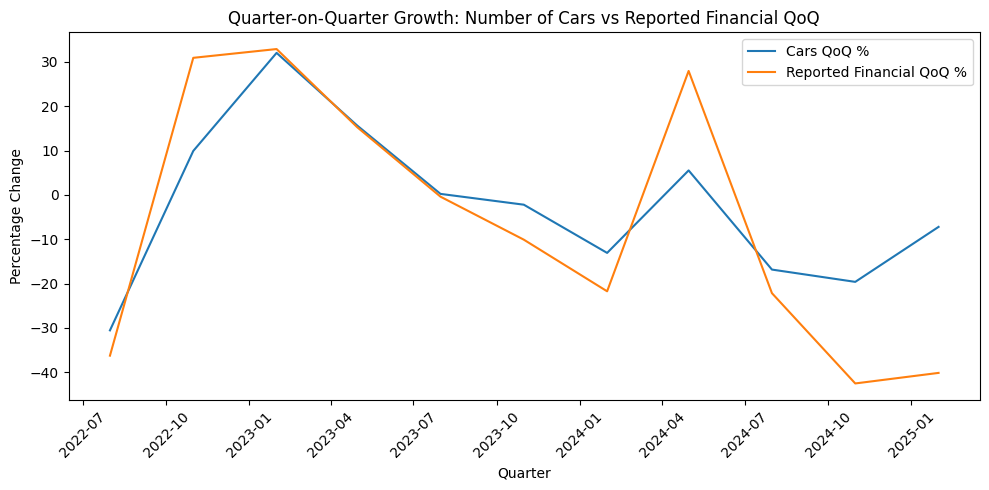

In [116]:
filtered_df_copy = filtered_df.copy()
filtered_df_copy

# Clean and convert QoQ column
filtered_df_copy['QoQ'] = filtered_df_copy['QoQ'].str.rstrip('%').astype(float)

# Convert Number of Cars to numeric
filtered_df_copy['Number of Cars'] = pd.to_numeric(filtered_df_copy['Number of Cars'], errors='coerce')

# Calculate Cars QoQ %
merged_df_copy = merged_df.copy()
merged_df_copy.sort_values('Quarter', inplace=True)

# Include the previous quarter's data for Cars QoQ % calculation
# Filter one additional quarter before the desired range
extended_df = merged_df_copy[merged_df_copy['Quarter'] >= "2022-04-30"].copy()

# Clean and convert Number of Cars to numeric
extended_df['Number of Cars'] = pd.to_numeric(extended_df['Number of Cars'], errors='coerce')

# Calculate Cars QoQ %
extended_df['Cars QoQ %'] = extended_df['Number of Cars'].pct_change() * 100

# Filter back to the desired range (2022-07-31 to 2025-01-31)
filtered_df = extended_df[(extended_df['Quarter'] >= "2022-07-31") & (extended_df['Quarter'] <= "2025-01-31")].copy()

plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_df_copy, x='Quarter', y='Cars QoQ %', label='Cars QoQ %')
sns.lineplot(data=filtered_df_copy, x='Quarter', y='QoQ', label='Reported Financial QoQ %')
plt.title('Quarter-on-Quarter Growth: Number of Cars vs Reported Financial QoQ')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Regression Analysis: Number of Cars vs Financial Metrics

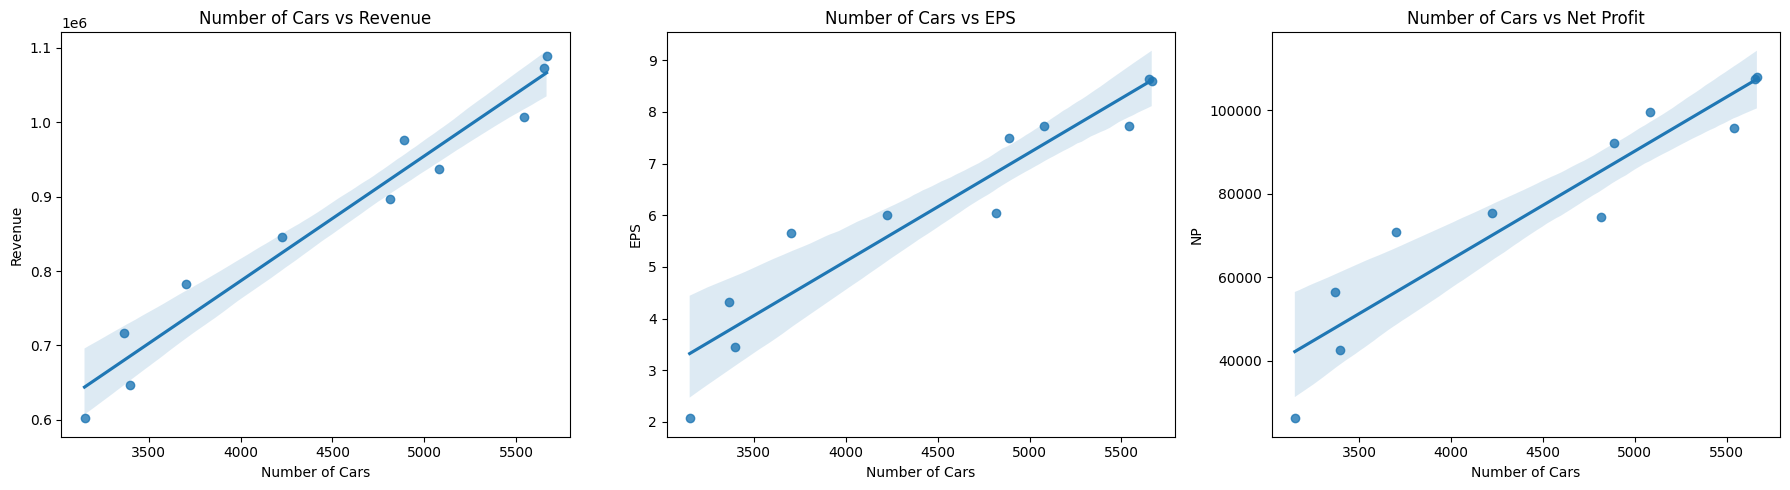

In [117]:
# Set up subplots for regression plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter: Number of Cars vs Revenue
sns.regplot(ax=axes[0], data=filtered_df, x='Number of Cars', y='Revenue')
axes[0].set_title('Number of Cars vs Revenue')

# Scatter: Number of Cars vs EPS
sns.regplot(ax=axes[1], data=filtered_df, x='Number of Cars', y='EPS')
axes[1].set_title('Number of Cars vs EPS')

# Scatter: Number of Cars vs Net Profit
sns.regplot(ax=axes[2], data=filtered_df, x='Number of Cars', y='NP')
axes[2].set_title('Number of Cars vs Net Profit')

plt.tight_layout()
plt.show()


Efficiency metric analysis (not sure)

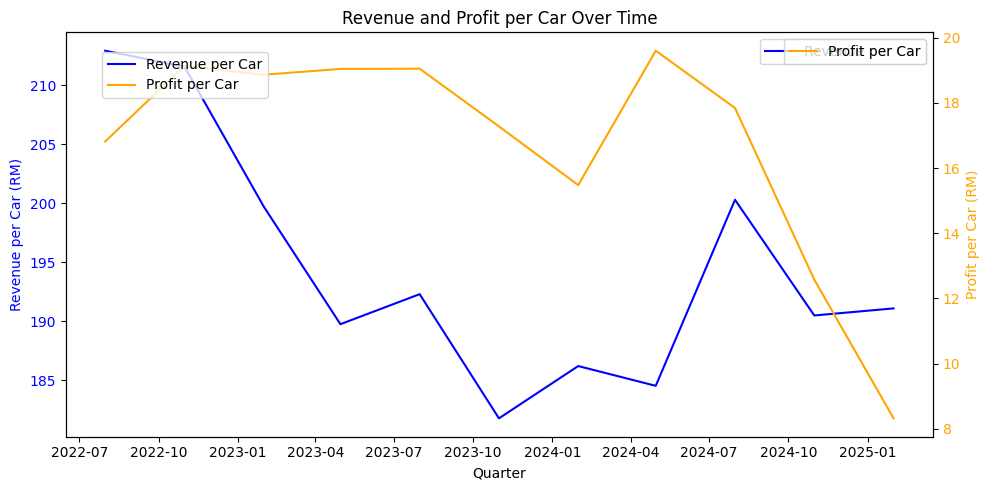

In [119]:
# Create efficiency metrics
filtered_df['Revenue per Car'] = filtered_df['Revenue'] / filtered_df['Number of Cars']
filtered_df['Profit per Car'] = filtered_df['NP'] / filtered_df['Number of Cars']

# Plot efficiency metrics over time
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Revenue per Car on the primary y-axis
sns.lineplot(data=filtered_df, x='Quarter', y='Revenue per Car', label='Revenue per Car', ax=ax1, color='blue')
ax1.set_ylabel('Revenue per Car (RM)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Profit per Car
ax2 = ax1.twinx()
sns.lineplot(data=filtered_df, x='Quarter', y='Profit per Car', label='Profit per Car', ax=ax2, color='orange')
ax2.set_ylabel('Profit per Car (RM)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Revenue and Profit per Car Over Time')
ax1.set_xlabel('Quarter')
plt.xticks(rotation=45)

# Add legends for both lines
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

Regression Model

In [125]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Prepare data for regression
model_df = filtered_df[['Number of Cars', 'Revenue']].dropna()
X = model_df[['Number of Cars']]
y = model_df['Revenue']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

model_coef = model.coef_[0]
model_intercept = model.intercept_

model_results = {
    "R-squared": r2,
    "MAE": mae,
    "RMSE": rmse,
    "Intercept": model_intercept,
    "Coefficient (Cars → Revenue)": model_coef
}

model_results

{'R-squared': 0.9288709837677455,
 'MAE': 41226.22639772692,
 'RMSE': 41575.735081497376,
 'Intercept': 92506.39181493246,
 'Coefficient (Cars → Revenue)': 173.84005878582298}

Regression Visualisation

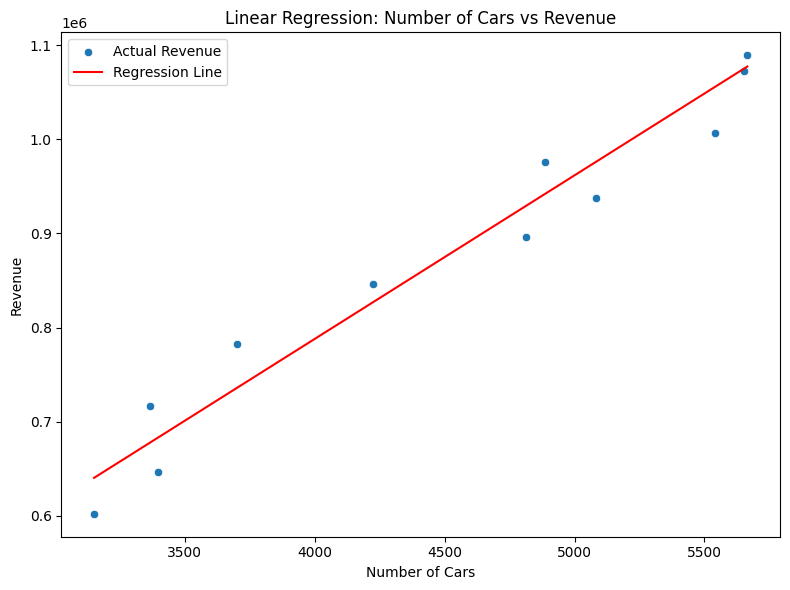

In [126]:
# Fix for scatter plot: use 1D series for x and y
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Number of Cars'], y=y, label='Actual Revenue')
sns.lineplot(x=X['Number of Cars'], y=model.predict(X), color='red', label='Regression Line')
plt.xlabel('Number of Cars')
plt.ylabel('Revenue')
plt.title('Linear Regression: Number of Cars vs Revenue')
plt.legend()
plt.tight_layout()
plt.show()
